In [25]:
import json
import numpy as np
with open('./head_score/llada-block-2500.json') as file:
    head_list = json.loads(file.readline())
## use the average retrieval score and ranking
head_score_list = [([int(ll) for ll in l[0].split("-")],np.mean(l[1])) for l in head_list.items()]
head_score_list = sorted(head_score_list, key=lambda x: x[1], reverse=True) 
top_retrieval_heads = [[l[0],  round(np.mean(l[1]), 2)] for l in head_score_list][:100]
print(top_retrieval_heads)

[[[21, 21], np.float64(14.77)], [[18, 1], np.float64(14.09)], [[23, 15], np.float64(13.44)], [[23, 13], np.float64(13.32)], [[16, 25], np.float64(13.21)], [[23, 19], np.float64(12.77)], [[21, 12], np.float64(12.72)], [[17, 22], np.float64(12.67)], [[19, 1], np.float64(12.53)], [[31, 11], np.float64(12.36)], [[24, 3], np.float64(12.26)], [[17, 19], np.float64(12.17)], [[19, 21], np.float64(12.1)], [[25, 15], np.float64(11.88)], [[15, 18], np.float64(11.88)], [[23, 9], np.float64(11.81)], [[26, 8], np.float64(11.72)], [[19, 29], np.float64(11.57)], [[24, 6], np.float64(11.53)], [[24, 1], np.float64(11.37)], [[18, 6], np.float64(11.36)], [[22, 17], np.float64(11.33)], [[19, 13], np.float64(11.29)], [[21, 16], np.float64(11.27)], [[13, 24], np.float64(10.93)], [[23, 2], np.float64(10.61)], [[13, 31], np.float64(10.49)], [[16, 23], np.float64(10.49)], [[29, 23], np.float64(10.43)], [[10, 28], np.float64(10.32)], [[16, 9], np.float64(10.3)], [[25, 31], np.float64(10.14)], [[25, 23], np.float

In [37]:
import json
import numpy as np
with open('./head_score/qwen2.5.json') as file:
    head_list = json.loads(file.readline())
## use the average retrieval score and ranking
head_score_list = [([int(ll) for ll in l[0].split("-")],np.mean(l[1])) for l in head_list.items()]
head_score_list = sorted(head_score_list, key=lambda x: x[1], reverse=True) 
top_retrieval_heads = [[l[0],  round(np.mean(l[1]), 2)] for l in head_score_list][:100]
print(top_retrieval_heads)

[[[22, 4], np.float64(20.97)], [[22, 3], np.float64(20.36)], [[14, 0], np.float64(19.6)], [[22, 7], np.float64(18.66)], [[19, 17], np.float64(18.51)], [[23, 11], np.float64(18.07)], [[22, 1], np.float64(18.02)], [[15, 20], np.float64(17.64)], [[19, 15], np.float64(17.39)], [[16, 13], np.float64(17.29)], [[17, 8], np.float64(16.98)], [[22, 27], np.float64(16.8)], [[16, 7], np.float64(16.8)], [[8, 22], np.float64(16.63)], [[21, 25], np.float64(16.55)], [[9, 8], np.float64(16.35)], [[14, 6], np.float64(15.93)], [[16, 9], np.float64(15.49)], [[22, 25], np.float64(15.43)], [[21, 13], np.float64(15.36)], [[21, 5], np.float64(14.98)], [[17, 18], np.float64(14.67)], [[19, 20], np.float64(14.65)], [[12, 24], np.float64(14.6)], [[16, 20], np.float64(14.37)], [[22, 24], np.float64(14.31)], [[14, 8], np.float64(13.61)], [[17, 7], np.float64(13.49)], [[8, 27], np.float64(13.4)], [[14, 3], np.float64(13.07)], [[23, 13], np.float64(13.02)], [[5, 19], np.float64(12.81)], [[4, 8], np.float64(12.78)], [

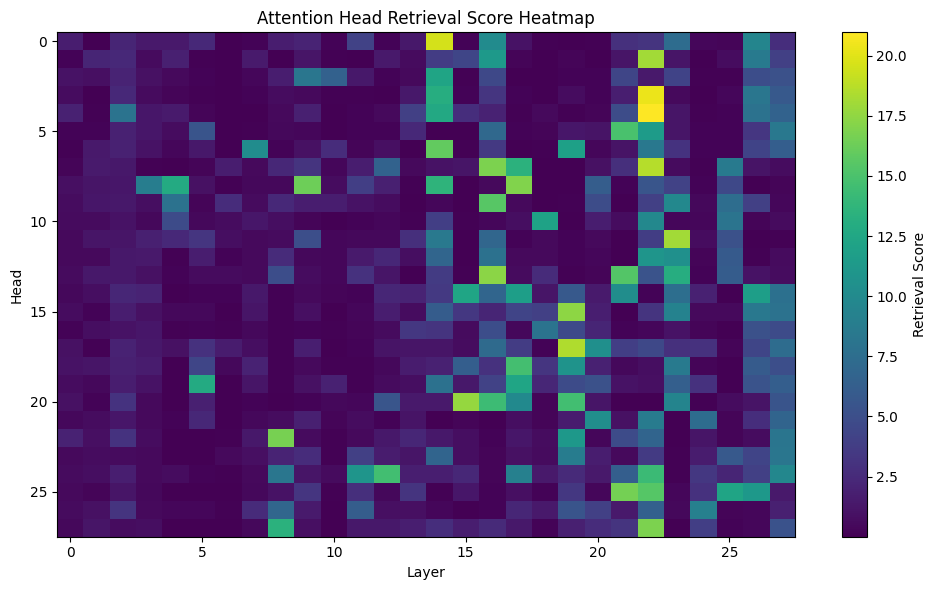

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 假设层数最多 32，每层最多 32 个 head
TICK_STEP = 5
num_layers = max(lh[0] for lh, _ in head_score_list) + 1
num_heads = max(lh[1] for lh, _ in head_score_list) + 1

def _build_ticks(size, step):
    if size <= 0:
        return np.array([], dtype=int)
    ticks = np.arange(0, size, step, dtype=int)
    if ticks.size == 0:
        return np.array([size - 1], dtype=int)
    if (size - 1) - ticks[-1] >= step:
        ticks = np.append(ticks, size - 1)
    return ticks

heatmap = np.full((num_layers, num_heads), np.nan)
for (lh, score) in head_score_list:
    layer, head = lh
    heatmap[layer, head] = score

data = heatmap.T  # head 作为 Y 轴，layer 作为 X 轴

plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis', aspect='auto', origin='upper')
plt.colorbar(label="Retrieval Score")
xticks = _build_ticks(num_layers, TICK_STEP)
yticks = _build_ticks(num_heads, TICK_STEP)
plt.xticks(xticks, xticks)
plt.yticks(yticks, yticks)
plt.xlabel("Layer")
plt.ylabel("Head")
plt.title("Attention Head Retrieval Score Heatmap")
plt.tight_layout()
plt.show()